In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [2]:
image = cv2.imread('sar_2_color.jpg')

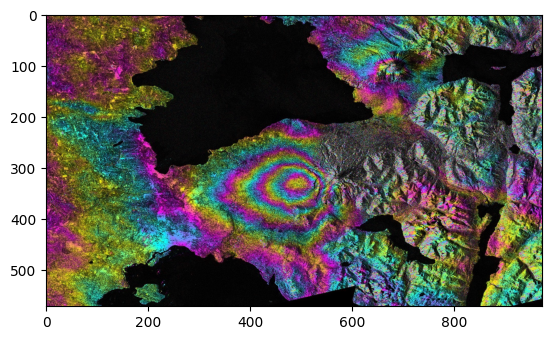

In [3]:
plt.imshow(image)

In [4]:
image.shape # h,w,c

(572, 974, 3)

In [5]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [6]:
# ROI
img_roi = image[100:200, 500:700]

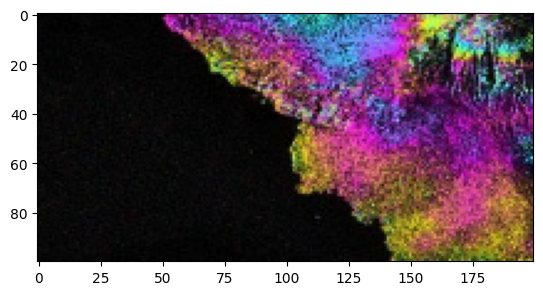

In [7]:
plt.imshow(img_roi)

In [8]:
b,g,r = cv2.split(image)

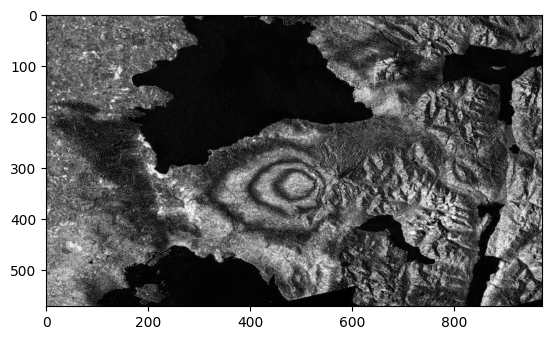

In [9]:
plt.imshow(b, cmap = 'gray')

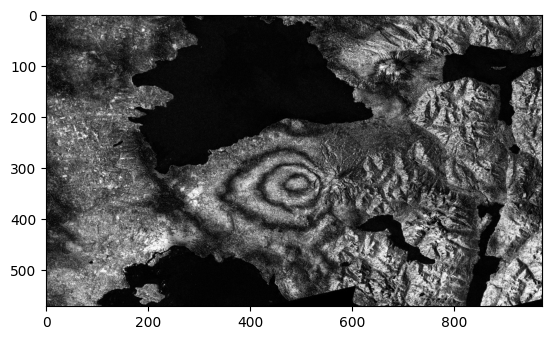

In [10]:
plt.imshow(g, cmap = 'gray')

In [11]:
# alternative approach
b = image[:,:,0]

In [12]:
import copy

image2 = copy.deepcopy(image)

In [13]:
image2[50:100,50:100] = [0,0,0]

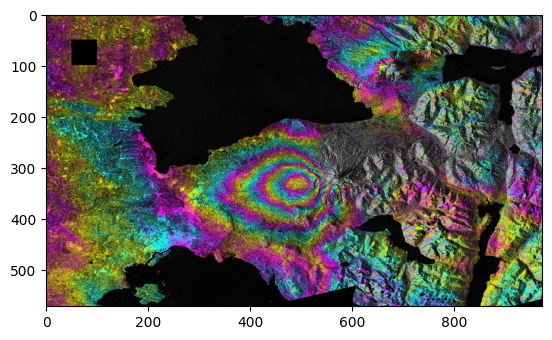

In [14]:
plt.imshow(image2)

In [15]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

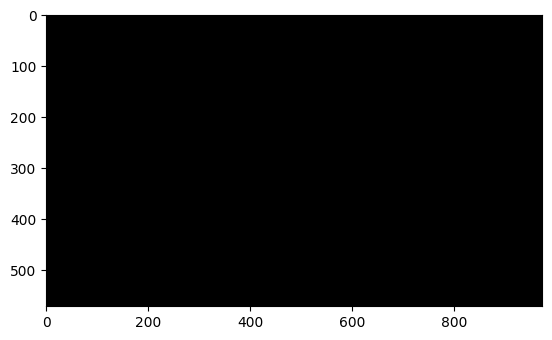

In [16]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [17]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [18]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [19]:
image_gray[0,0]

np.uint8(40)

In [20]:
image_gray.shape

(572, 974)

In [21]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [22]:
image_hsv.shape

(572, 974, 3)

In [23]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [24]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [25]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [26]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [27]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

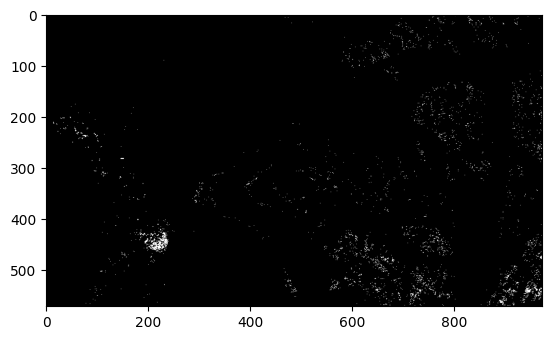

In [28]:
plt.imshow(thresh1, cmap='gray')

In [29]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [30]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

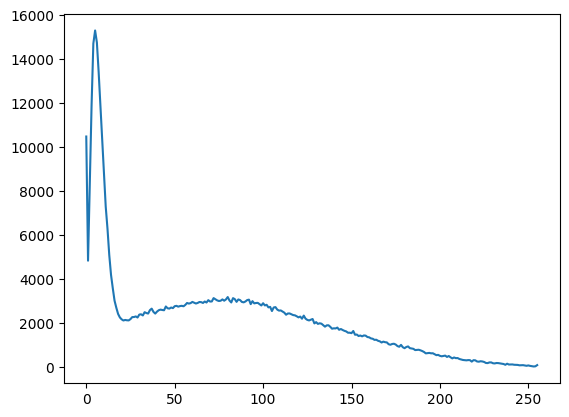

In [31]:
plt.plot(b_hist)

In [32]:
b_hist_cum = b_hist.cumsum()

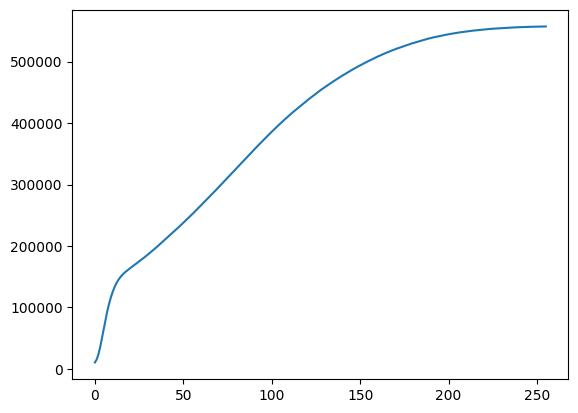

In [33]:
plt.plot(b_hist_cum)

In [34]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

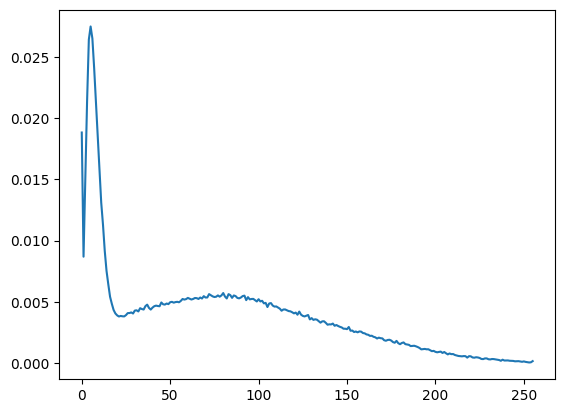

In [35]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [36]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


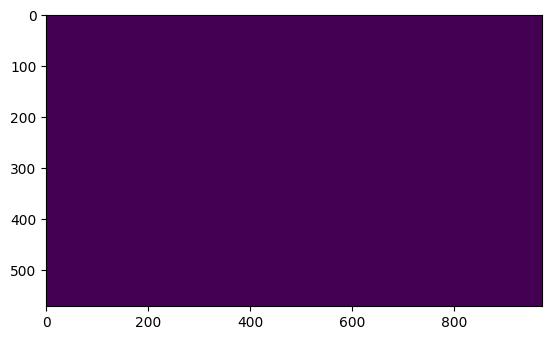

In [37]:
plt.imshow(diff)

In [38]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [39]:
mean = image_gray.mean()

In [40]:
std = image_gray.std()

In [41]:
print(mean,std)

67.41225535245043 52.016191875959635


In [42]:
eq_gray = cv2.equalizeHist(image_gray)

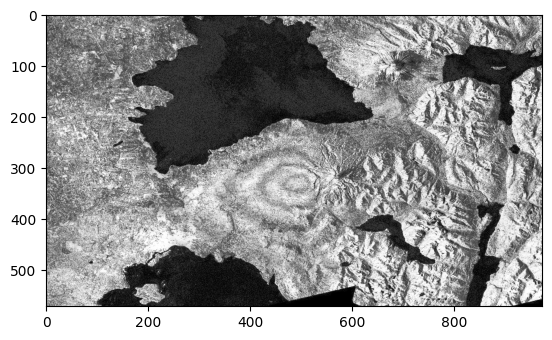

In [43]:
plt.imshow(eq_gray, cmap="gray")


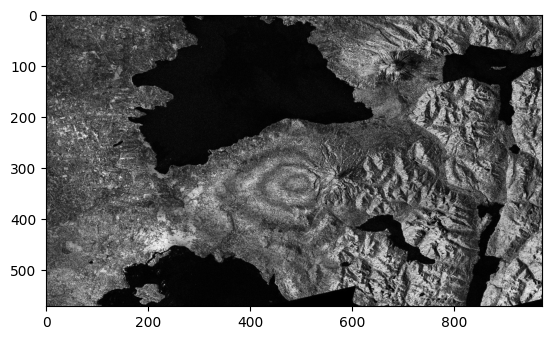

In [44]:
plt.imshow(image_gray, cmap="gray")

In [45]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [46]:
#1

In [47]:
image = cv2.imread('sar_1_gray.jpg')

In [48]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [49]:
image1 = cv2.imread('sar_2_color.jpg')

In [50]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 

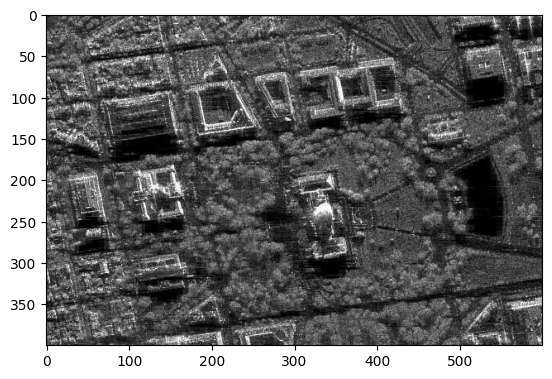

In [51]:
plt.imshow(image)

In [52]:
# 2

In [53]:
hSize = 256
hRange = [0, 256]

h = cv2.calcHist([image], [0], None, [hSize], hRange, accumulate=False)

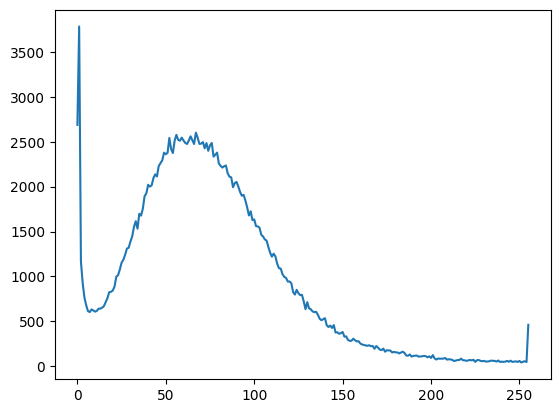

In [54]:
plt.plot(h);

In [55]:
# 3

In [56]:
rMax = 255;
gamma1 = 0.5
im1_gray = image_gray; 
r1 = [((i / rMax) ** gamma1) * rMax for i in range(256)];
r1 = np.array(r1, np.uint8);
im1_gray = cv2.LUT(im1_gray, r1)

In [57]:
rMax = 255;
gamma2 = 4.0; 
im2_gray = image_gray; 
r2 = [((i / rMax) ** gamma2) * rMax for i in range(256)];
r2 = np.array(r2, np.uint8);
im2_gray = cv2.LUT(im2_gray, r2)

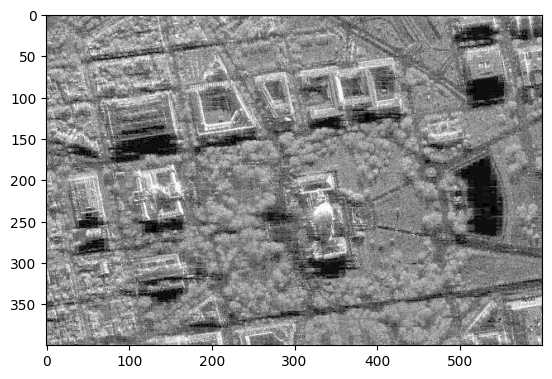

In [58]:
plt.imshow(im1_gray, cmap='gray');

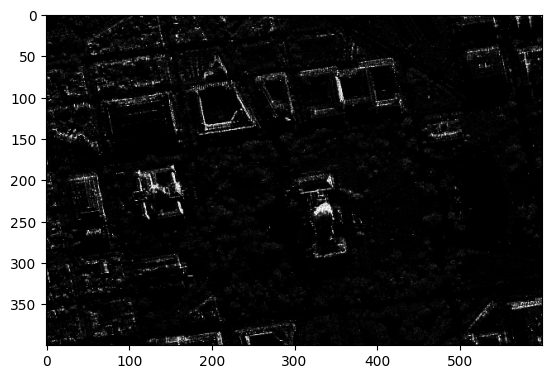

In [59]:
plt.imshow(im2_gray, cmap='gray');

In [60]:
# 4

In [61]:
from skimage.metrics import structural_similarity, mean_squared_error

In [62]:
mse = mean_squared_error(image_gray, im1_gray)

In [63]:
mse

np.float64(3250.429145833333)

In [64]:
(ssim, diff) = structural_similarity(image_gray, im1_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 0.7875008686792753


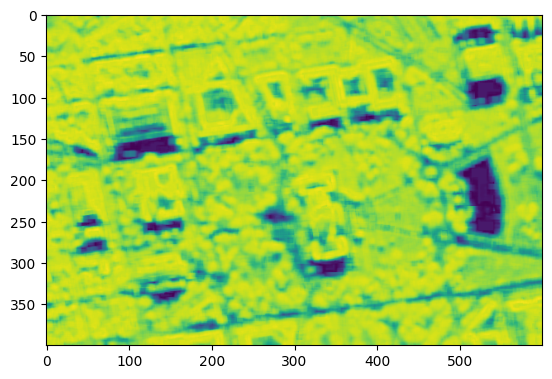

In [86]:
plt.imshow(diff)

In [66]:
# 5

In [87]:
eq_gray = cv2.equalizeHist(image1_gray)

In [88]:
e_original = np.mean(image_gray)
e_eq = np.mean(eq_gray)

In [92]:
d_original = np.std(image_gray)
d_eq = np.std(eq_gray)

image_gray_corrected = np.clip(((image_gray.astype(float) - e_original) * (d_eq / d_original)) + e_eq, 0, 255).astype(np.uint8)

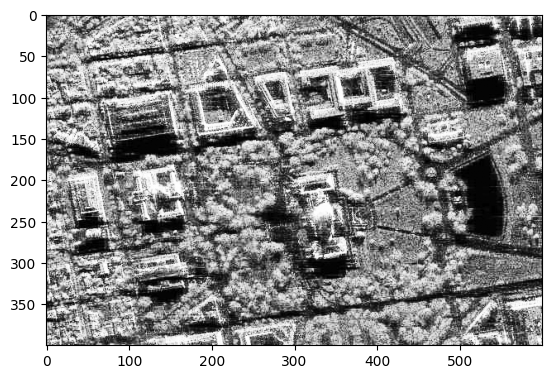

In [93]:
plt.imshow(image_gray_corrected, cmap="gray")

In [78]:
# 6

In [79]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

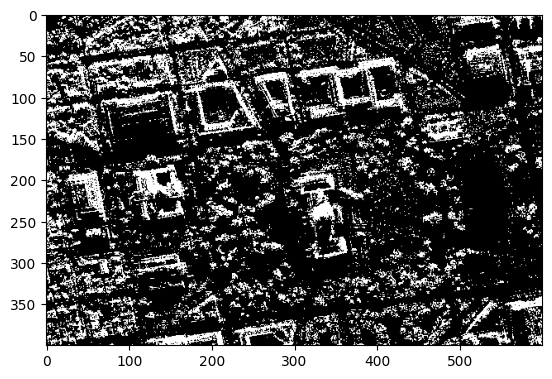

In [80]:
plt.imshow(thresh1, cmap='gray')

In [81]:
thresh1[thresh1==100].sum()

np.uint64(0)

In [82]:
_,thresh2 = cv2.threshold(image_gray,100,255,cv2.THRESH_BINARY)

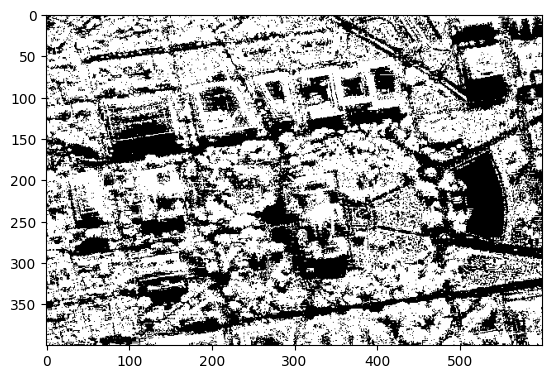

In [83]:
plt.imshow(thresh2, cmap='gray')

In [84]:
_,thresh3 = cv2.threshold(image_gray,10,255,cv2.THRESH_BINARY)

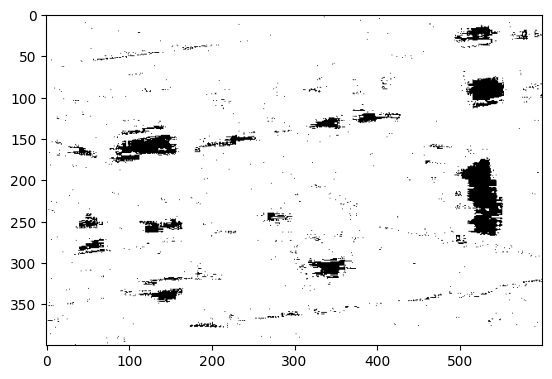

In [85]:
plt.imshow(thresh3, cmap='gray')

In [95]:
# В #5 пункте теперь беру исходное image_gray, а не уже эквализированное изначально.